This code was created by Guilherme Vieira (@guilhermewells/sechat.blog for the youtube channel https://www.youtube.com/user/guilhermewellsful).

# Para que serve Matriz ?

In [1]:
import numpy as np
import sympy as sp
from sympy import init_printing
init_printing() 

The evolution of fermion is given by

$\langle\psi_{8}|U_{-u\delta_{t}}|\psi_{7}\rangle\langle\psi_{7}|U_{-u\delta_{t}}|\psi_{6}\rangle\langle\psi_{6}|U_{-u\delta_{t}}|\psi_{5}\rangle\langle\psi_{5}|\hat{I}|\psi_{4}\rangle\langle\psi_{4}|U_{+u\delta_{t}}|\psi_{3}\rangle\langle\psi_{3}|U_{+u\delta_{t}}|\psi_{2}\rangle\langle\psi_{2}|U_{+u\delta_{t}}|\psi_{1}\rangle\langle\psi_{1}|\hat{-\rho_{0}}|\psi_{8}\rangle.$

The evolution line above can be writen in the following matrix. "U" has the shape of $e^{-ih_{\pm}\delta t}$ (not being accurate)

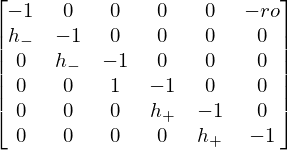

In [2]:
hu, hd, ro = sp.symbols('h_+ h_- ro')
N = 6
M = [[0 for o in range(N)] for y in range(N)]

for i in range(N):
    for j in range(N):
        if i == j: 
            M[i][j] = -1
        elif i == 0 and j == N - 1:
            M[i][j] = -ro
            
        elif (i - j) == 1:
            if i < N/2:
                M[i][j] = hd
            elif N/2 < i < N:
                M[i][j] = hu         
            elif i != 0 and i != 1 and (i%3) == 0:
                M[i][j] = 1
            
Ginv = sp.Matrix(M)
Ginv

In [3]:
#determinant
sp.det(Ginv)

The inversion of the matrix gives the Green's functions matrice. Four blocks should be considered. The diagonal Keldysh like, and the non-diagonal "interworld"

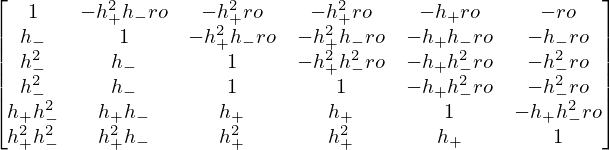

In [4]:
#the matrix has the determinant multiplied for simplification reasons, it's just a common denominator
G = sp.simplify((Ginv**-1)*(-1)*sp.det(Ginv))
G

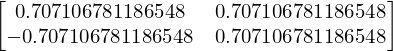

In [13]:
R = sp.Matrix(((2**(1/2))/2)*np.array([[1,1],[-1,1]]))
R

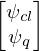

In [29]:
psiu, psid = sp.symbols('\psi_+ \psi_-')
psicl, psiq = sp.symbols('\psi_{cl} \psi_{q}')

sp.Matrix([psicl, psiq])


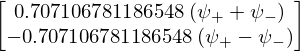

In [15]:
sp.factor(R*sp.Matrix([psip, psim]))

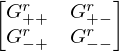

In [17]:
gpp, gpm, gmp, gmm,  = sp.symbols('G_{++}^{r} G_{+-}^{r} G_{-+}^{r} G_{--}^{r} ')

Gt=sp.Matrix([[gpp,gpm],[gmp,gmm]])
Gt

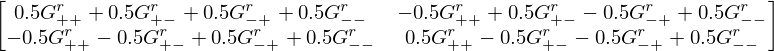

In [19]:
G_rot = R*Gt*(R.T)
G_rot

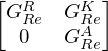

In [20]:
grr, gar,gkr = sp.symbols('G^{R}_{Re} G^{A}_{Re} G^{K}_{Re}')
Grt = sp.Matrix([[grr,gkr],[0,gar]])
Grt

In [ ]:
Keldysh